# Create Geo Map of Ontario B Corporations

author: Keanna Knebel

date: 2020-08-07

In [1]:
import pandas as pd
import numpy as np
import re
import json

# Plotly
import plotly.graph_objects as go
import plotly.express as px

In [2]:
with open('creds.json') as f:
    data = json.load(f)
mapbox_access_token = data['map_box_key']

In [3]:
df = pd.read_csv("data/ont_bcorps.csv")

df = df[df.current_status == 'certified']
df.drop_duplicates(subset=['company_name'], inplace=True, ignore_index=True)
df.head()

,company_name,date_first_certified,date_certified,current_status,description,industry,industry_category,products_and_services,country,state,...,website,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,geom,specific
0,Vancity Community Investment Bank,2018-02-13,2018-02-13,certified,VCIB is a nationally-focused subsidiary of Van...,Credit Provider,Financial Services,VCIB provides debt financing and advisory serv...,Canada,Ontario,...,www.vancitycommunityinvestmentbank.ca,2017,89.7,18.1,14.1,10.9,11.8,33.3,"{'lat': 43.644175, 'lng': -79.4022042}",1
1,PenFinancial Credit Union Limited,2019-01-30,2019-01-30,certified,A truly local Niagara based financial co-opera...,Other,Financial Services,"Financial products and services, including wea...",Canada,Ontario,...,www.penfinancial.com,2018,109.3,36.4,13.2,2.2,19.6,37.7,"{'lat': 43.1556225, 'lng': -79.2729631}",1
2,Ian Martin Group,2012-01-09,2019-03-01,certified,Founded by engineers to support the needs of t...,HR Consulting & Recruiting,Business Products & Services,Technical Recruiting and Hiring Technology,Canada,Ontario,...,ianmartin.com,2018,109.8,41.8,0.0,11.3,22.0,34.6,"{'lat': 43.4665765, 'lng': -79.67689879999999}",1
3,Oliberte Limited,2012-06-20,2020-04-28,certified,Oliberté is a Canadian premium leather goods c...,"Apparel, Footwear & Accessories",Consumer Products & Services,"Footwear, Bags",Canada,Ontario,...,oliberte.com,2019,80.6,19.9,3.4,19.1,14.7,23.2,"{'lat': 43.4286135, 'lng': -79.7062878}",1
4,Good Food for Good Inc.,2018-06-28,2018-06-28,certified,Good Food For Good is an organic food company ...,Food & Beverage,Consumer Products & Services,"Organic Ketchup, BBQ Sauces, Fresh Cooking Sau...",Canada,Ontario,...,www.goodfoodforgood.ca,2018,88.0,42.4,0.0,18.2,7.4,19.9,"{'lat': 45.1377, 'lng': -76.1429}",1


In [4]:
# initialize empty lists
lat = []
long = []

# format the geom column into longitude and latitude
for x in df.geom:
    x = re.sub('[{}\',]', '', x)
    x = x.split()
    lat.append(float(x[1]))
    long.append(float(x[3]))

In [5]:
df['lat'] = lat
df['long'] = long
df.head()

,company_name,date_first_certified,date_certified,current_status,description,industry,industry_category,products_and_services,country,state,...,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,geom,specific,lat,long
0,Vancity Community Investment Bank,2018-02-13,2018-02-13,certified,VCIB is a nationally-focused subsidiary of Van...,Credit Provider,Financial Services,VCIB provides debt financing and advisory serv...,Canada,Ontario,...,89.7,18.1,14.1,10.9,11.8,33.3,"{'lat': 43.644175, 'lng': -79.4022042}",1,43.644175,-79.402204
1,PenFinancial Credit Union Limited,2019-01-30,2019-01-30,certified,A truly local Niagara based financial co-opera...,Other,Financial Services,"Financial products and services, including wea...",Canada,Ontario,...,109.3,36.4,13.2,2.2,19.6,37.7,"{'lat': 43.1556225, 'lng': -79.2729631}",1,43.155622,-79.272963
2,Ian Martin Group,2012-01-09,2019-03-01,certified,Founded by engineers to support the needs of t...,HR Consulting & Recruiting,Business Products & Services,Technical Recruiting and Hiring Technology,Canada,Ontario,...,109.8,41.8,0.0,11.3,22.0,34.6,"{'lat': 43.4665765, 'lng': -79.67689879999999}",1,43.466577,-79.676899
3,Oliberte Limited,2012-06-20,2020-04-28,certified,Oliberté is a Canadian premium leather goods c...,"Apparel, Footwear & Accessories",Consumer Products & Services,"Footwear, Bags",Canada,Ontario,...,80.6,19.9,3.4,19.1,14.7,23.2,"{'lat': 43.4286135, 'lng': -79.7062878}",1,43.428613,-79.706288
4,Good Food for Good Inc.,2018-06-28,2018-06-28,certified,Good Food For Good is an organic food company ...,Food & Beverage,Consumer Products & Services,"Organic Ketchup, BBQ Sauces, Fresh Cooking Sau...",Canada,Ontario,...,88.0,42.4,0.0,18.2,7.4,19.9,"{'lat': 45.1377, 'lng': -76.1429}",1,45.137700,-76.142900


In [6]:
# replace NaN values with string 'N/A'
df.replace(np.nan, {'industry': 'N/A ', 'industry_category': 'N/A '}, inplace=True)

# Save dataframe to CSV file
df.to_csv('data/mapped_ont_bcorps.csv', index=False)

In [ ]:
latInitial = 44
lonInitial = -79
zoom = 5.5
opacity = 0.75

customdata = pd.DataFrame({
            'Business Name': df.company_name,
            'Industry': df.industry_category,
            'Cert': df.date_first_certified,
            'Impact Score' : df.overall_score})

fig = (go.Figure(
    data=go.Scattermapbox(
        lat=df['lat'],
        lon=df['long'],
        mode="markers",
        customdata=customdata,
        marker=dict(
            opacity=opacity,
            size=7,
            color=df['overall_score'],
            colorscale='YlOrRd',
            showscale=True,
            colorbar=dict(
                title="Overall Impact Score",
                titlefont=dict(
                    family='Open Sans',
                    size=16),
                bgcolor="#404349",
                x=1,
                xanchor='left',
                ticks="outside",
                tickcolor="white",
                tickwidth=2,)),
        hovertemplate=
            "<b>%{customdata[0]}</b><br>" +
            "<br>Industry: %{customdata[1]}" +
            "<br>Certified since: %{customdata[2]}" +
            "<br>Overall Impact Score: %{customdata[3]}" +
            "<extra></extra>"
    ),

    layout=go.Layout(
        margin={'l': 0, 'r': 0, 't': 0, 'b': 0},
        autosize=True,
        font={"color": "white"},
        mapbox=dict(
            accesstoken=mapbox_access_token,
            center=dict(
                lat=latInitial,
                lon=lonInitial),
            style="dark",
            zoom=zoom,
            bearing=0
        ),
    )
))
fig.update_layout(
    height=100)

In [ ]:
industries = df.industry_category.unique()

In [ ]:
counts = df.industry_category.value_counts()
ind = list(counts.index)

In [ ]:
fig = go.Figure(
        data=go.Bar(
            y=ind,
            x=counts,
            marker_color='#19B1BA',
            hovertemplate="%{x}: %{y}<extra></extra>",
            orientation='h'),
        layout=go.Layout(
            margin={'l': 10, 'r': 10, 't': 10, 'b': 10},
            template='simple_white',
            annotations=[
                dict(
                    x=xi,
                    y=yi,
                    text=yi,
                    xanchor="left",
                    yanchor="middle",
                    showarrow=False,
                )
            for xi, yi in zip(counts, ind)
            ],
            yaxis=go.XAxis(
                showticklabels=False)
        ))
fig.update_layout(
        barmode='group',
        xaxis_title="Number of Businesses",
        yaxis_title="Industry",
        height=350)
fig

In [ ]:
df

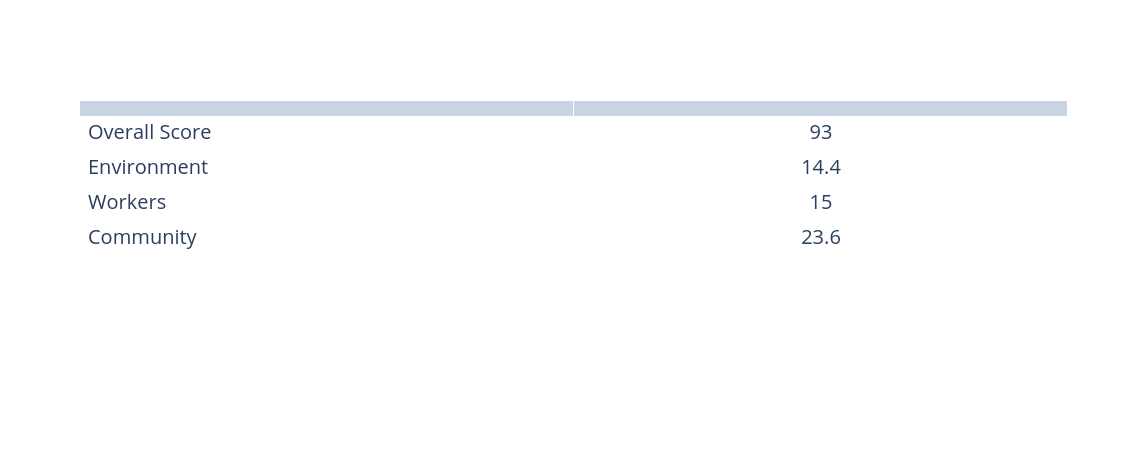

In [8]:
areas = ["Overall Score", "Environment", "Workers", "Community"]
scores = [93, 14.4, 15, 23.6]
fig = go.Figure(
        data=[
            go.Table(
                    cells=dict(
                        values=[areas, scores],
                        fill=dict(color=['white']),
                        align=['left', 'center'],
                        font_size=20,
                        height=35)
                )
            ]
        )
fig